# Shower profile for the electromagnetic calorimeter
The notebook contrains a skatch of the shower profile analysis

The energy deposition is measured using a cumulative distribution
![here is the Figure](data/ecal_shower.png)

In [6]:
function cdf(x,y,args...)
    a = args[1]
    b = args[2]
    1/4+a*(atan(x/b)+atan(y/b)+atan(x*y/(b*sqrt(b^2+x^2+y^2))))/(2π)
end

cdf (generic function with 1 method)

In [3]:
using Plots

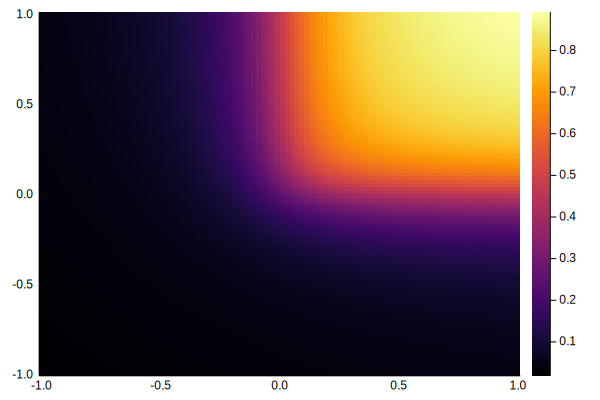

In [17]:
let xv = linspace(-1,1,100), yv = linspace(-1,1,100)
    heatmap(xv, yv, [cdf(x,y,1,0.2) for y in yv, x in yv])
end

In [26]:
function en_dep(cdf, dist_in_cell_units...)
    v = [dist_in_cell_units[1], dist_in_cell_units[2]]
    vuu = v+[ 1, 1]/2
    vdd = v+[-1,-1]/2
    vud = v+[ 1,-1]/2
    vdu = v+[-1,-1]/2    
    cdf(vuu...) - cdf(vud...) - cdf(vdu...) + cdf(vdd...)
end

en_dep (generic function with 3 methods)

In [55]:
function sigmaE(E) # make sure that E is in GeV
    c = 0.02 # constant_term
    s = 0.06 # stochastic term
    E*sqrt(c^2+(s/sqrt(E)))
end

sigmaE (generic function with 1 method)

In [67]:
let d = 0.2
    x_cell, y_cell = 1.1, 0.3
    x_cent, y_cent = 0.3, 0.7
    en_dep((x,y)->cdf(x,y,1,0.2), (x_cell-x_cent)/d, (y_cell-y_cent)/d)
end

0.0160975867866385

### Here is the functions to analysy a single shower
For the example, I make up some measurements in the format `(x,y,E)`

In [28]:
measuments = [(2.3,0.1,0.3), (6.3,-0.1,0.6)]

2-element Array{Tuple{Float64,Float64,Float64},1}:
 (2.3, 0.1, 0.3) 
 (6.3, -0.1, 0.6)

In [68]:
# the main function
function build_chi2(measurements, d=1.0)
    E_tot = sum(map(x->x[1],measuments))
    # get center of gravity
    x_cent = sum(map(x->x[1]*x[2],measuments))
    y_cent = sum(map(x->x[1]*x[3],measuments))
    function χ2(pars...)
        mycdf(x,y) = cdf(x,y,pars...)
        sum((E - E_tot*en_dep(mycdf, (x-x_cent)/d, (y-y_cent)/d))^2/sigmaE(E)^2 for (E,x,y) in measurements)
    end
    return χ2
end

build_chi2 (generic function with 2 methods)

In [69]:
χ2 = build_chi2(measuments)

χ2 (generic function with 1 method)

In [70]:
χ2(1,0.2) # it works!!

65.44971619260618

For several showers use sum of the individual $\chi_2$

### The next step is to minimize
have a look at `NLopt.jl` package and `ForwardDiff.jl` packages